# Chapter 3 of SR2

## Goal
1. Grid based posterior computation
1. Sampling from posterior on the grid
1. Representation of PDF of PMF by a set of samples, sample plot, histogram, kde plot
1. mean, hdi, percentile of posterior distribution (PMF)

# install
1. install current version of anaconda - just click yes till the end.
1. In the left pane, click 'Environment', and create a new env with python version 3.6.
1. Click install `CMD.exe Prompt` in `Anaconda Navigator`, and open it, and execute:

```
$ python -m pip install --upgrade pip
$ pip install --use-feature=2020-resolver pymc3 theano
```
- check the version of theano installed; it should be 1.05. 1.04 caused a lot of errors.

## JupyterLab
If jupyterLab does not open from Anaconda Navigator, open `CMD.exe Prompt', use `pip` to install jupyterlab and run `jupyter-lab` in the command window.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
import pymc3 as pm

In [5]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use('arviz-darkgrid')

## Grid computation

In [31]:
n_success = 6
n_tosses = 9

## 10 grid posteror

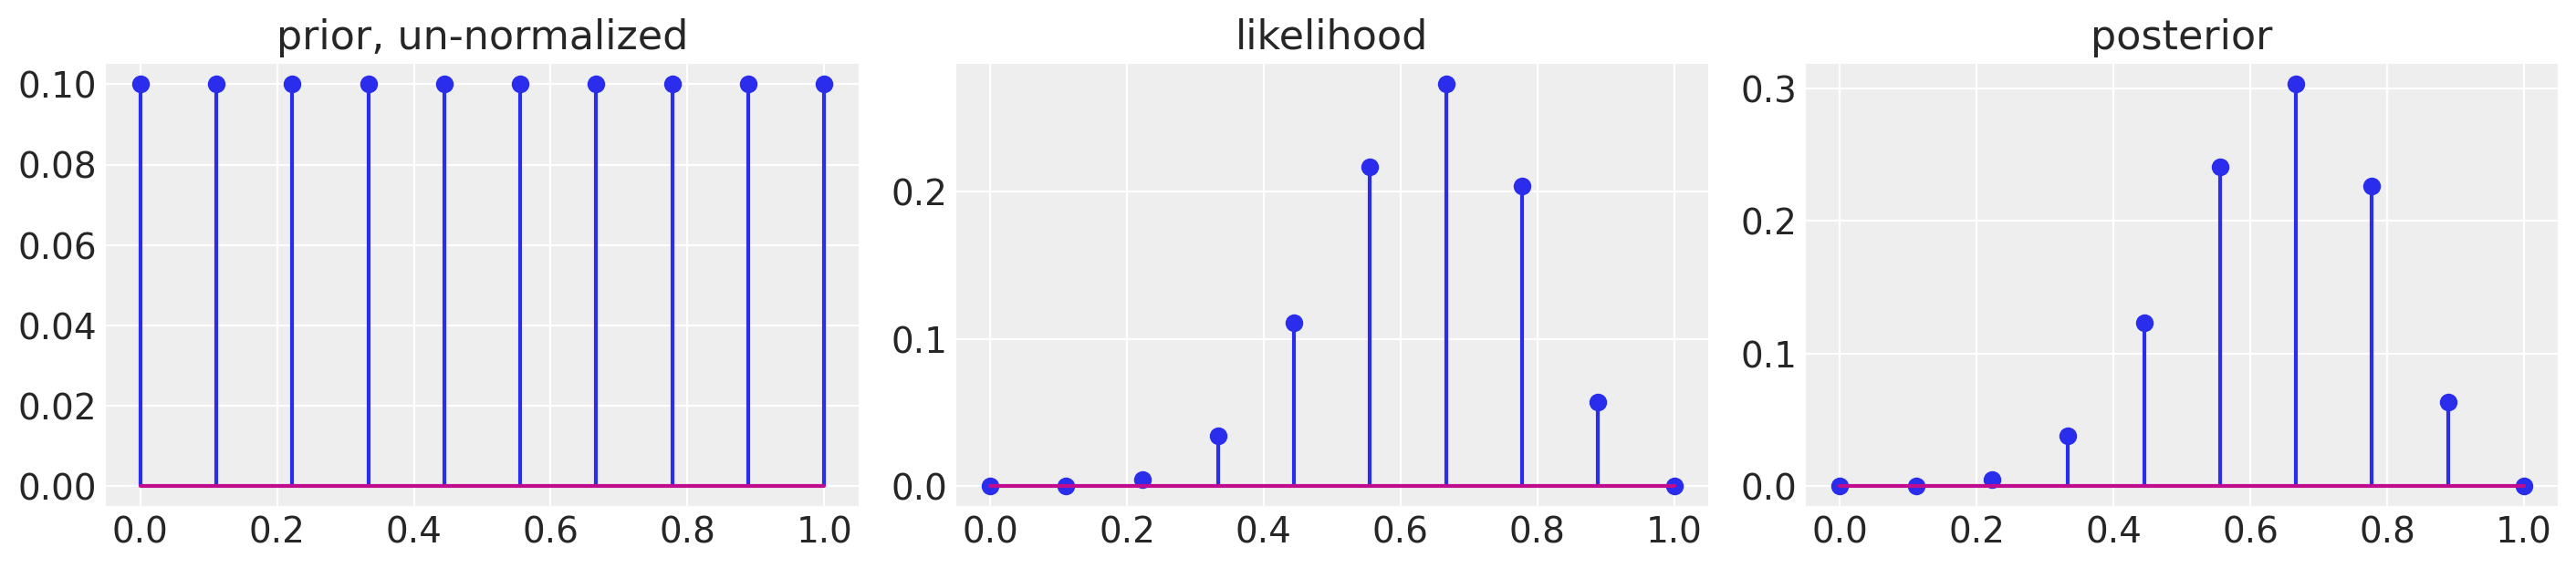

In [32]:
n_grids = 10
p_grid = np.linspace(0, 1, n_grids); p_grid

prior = np.repeat(1./n_grids, n_grids); prior
likeli = stats.binom.pmf(n_success, n_tosses, p_grid);
posterior_un = likeli * prior
posterior = posterior_un / sum(posterior_un)
# print('likeli: ', likeli)

fig, axes = plt.subplots(1,3, figsize=(14,3))
axes[0].stem(p_grid, prior); axes[0].set_title('prior, un-normalized')
axes[1].stem(p_grid, likeli); axes[1].set_title('likelihood');
axes[2].stem(p_grid, posterior); axes[2].set_title('posterior');

## 100 grid posteror

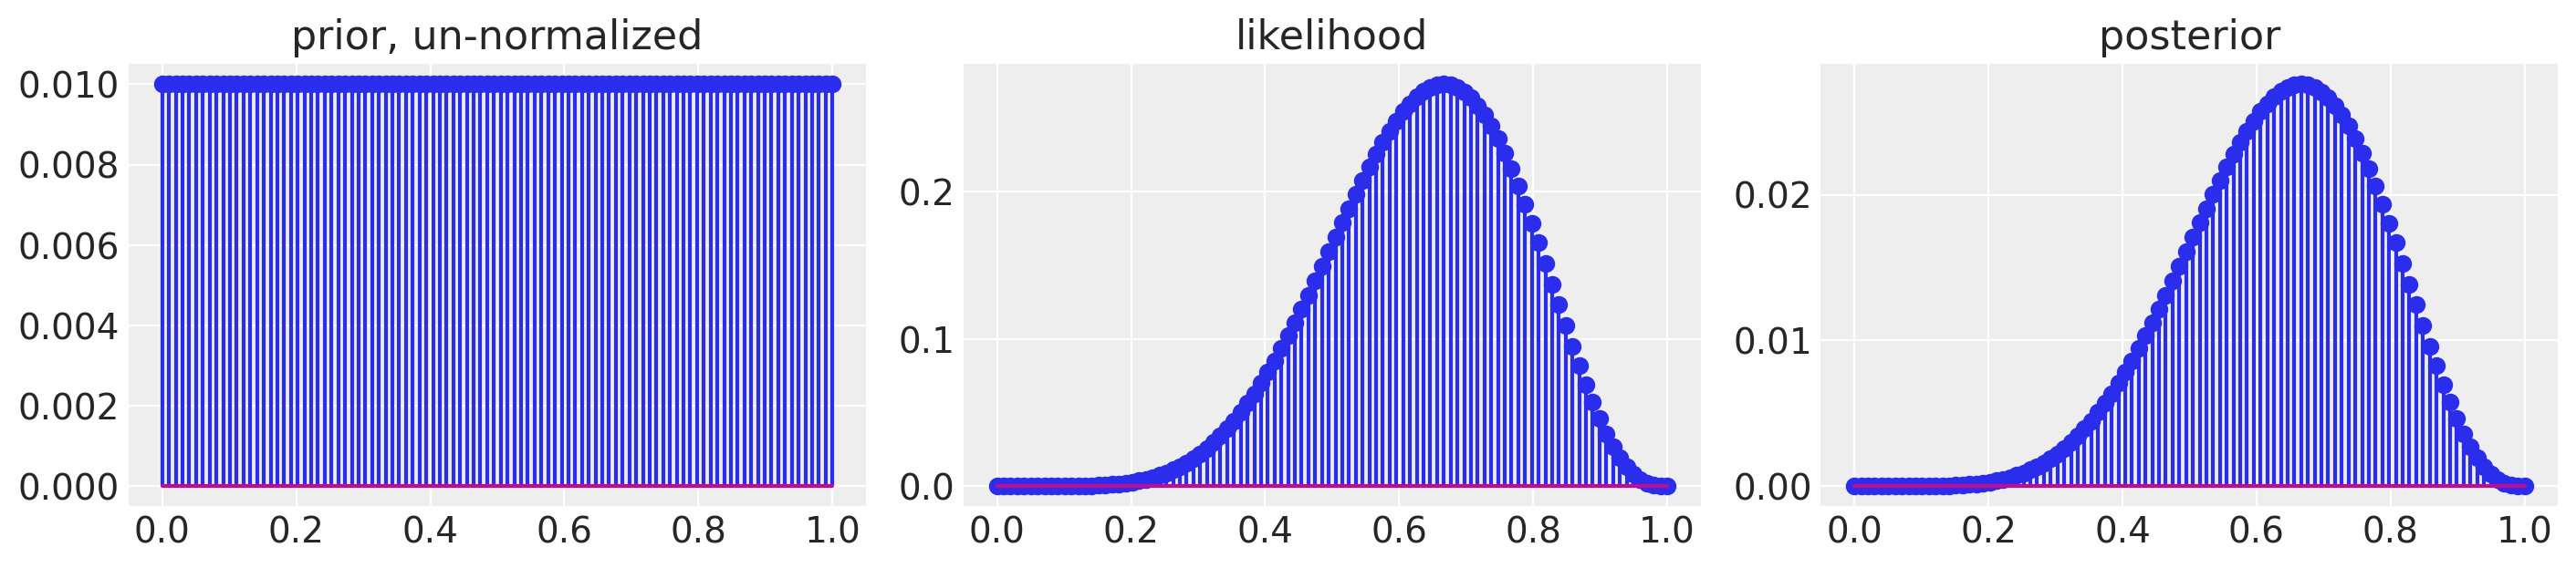

In [34]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)

prior = np.repeat(1./n_grids, n_grids); prior
likeli = stats.binom.pmf(n_success, n_tosses, p_grid);
posterior_un = likeli * prior
posterior = posterior_un / sum(posterior_un)
# print('likeli: ', likeli)

fig, axes = plt.subplots(1,3, figsize=(14,3))
axes[0].stem(p_grid, prior); axes[0].set_title('prior, un-normalized')
axes[1].stem(p_grid, likeli); axes[1].set_title('likelihood');
axes[2].stem(p_grid, posterior); axes[2].set_title('posterior');

In [130]:
def posterior_grid (n_grids, n_success=6, n_tosses=9, prior='uniform'):
    p_grid = np.linspace(0, 1, n_grids)

    if type(prior) == str and prior == 'uniform':
        prior = stats.uniform.pdf(p_grid)
    
    likeli = stats.binom.pmf(n_success, n_tosses, p_grid);
    posterior_un = likeli * prior
    posterior = posterior_un / sum(posterior_un)
    # print('likeli: ', likeli)

    fig, axes = plt.subplots(1,3, figsize=(14,3))
    axes[0].plot(p_grid, prior); axes[0].set_title('prior, un-normalized')
    axes[1].plot(p_grid, likeli); axes[1].set_title('likelihood');
    axes[2].plot(p_grid, posterior); axes[2].set_title('posterior');
    
    return p_grid, posterior

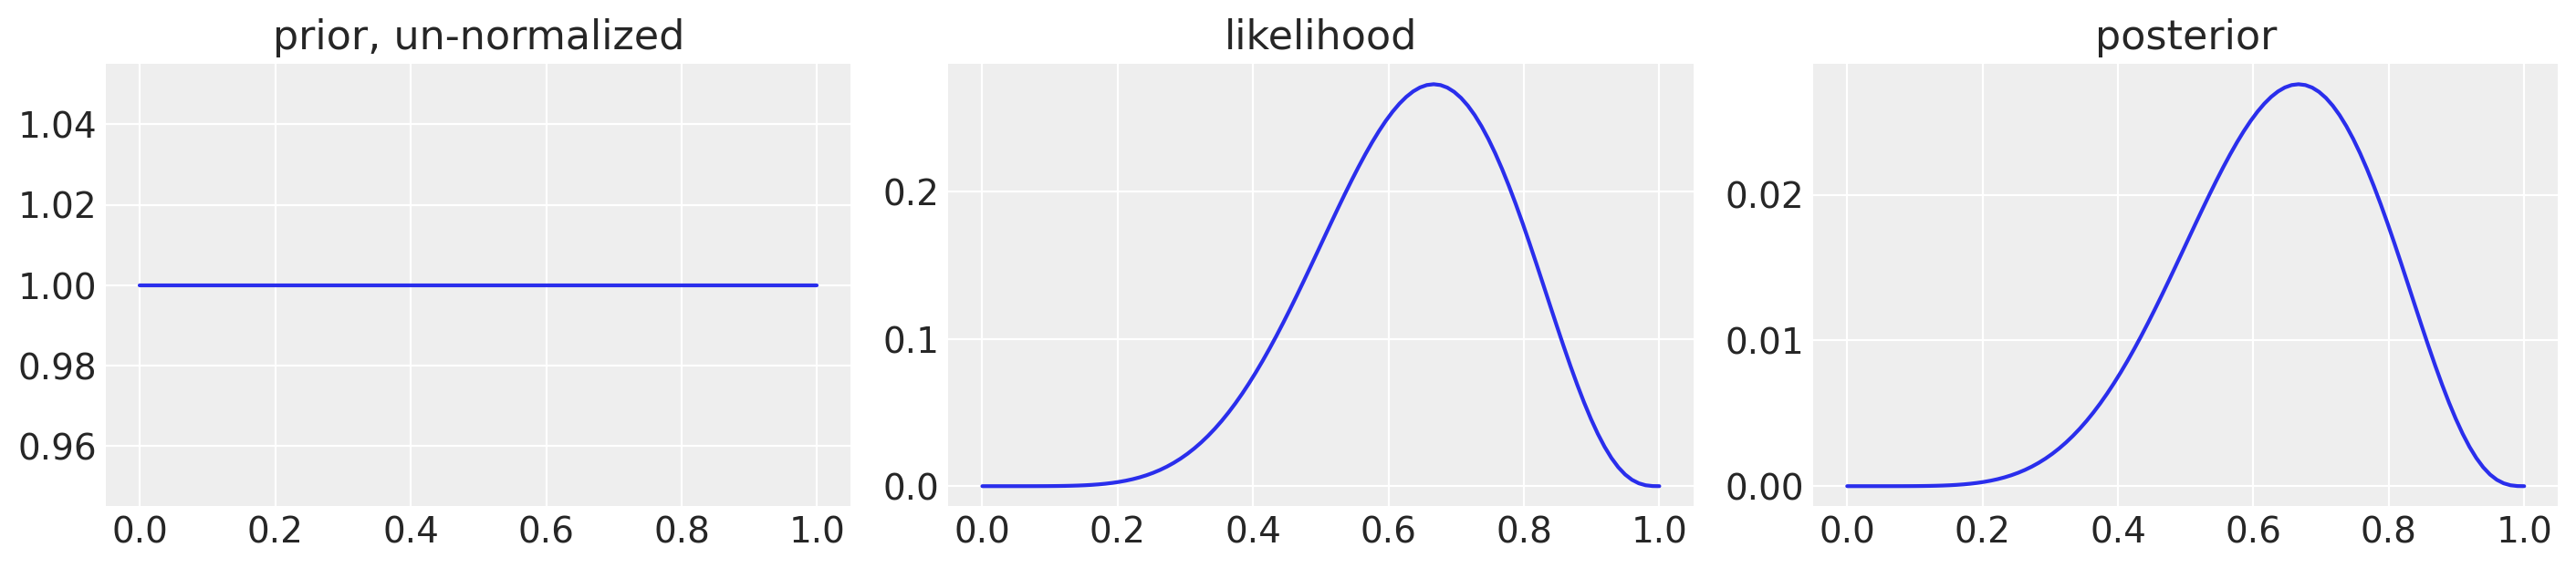

In [131]:
posterior_grid(100, n_success, n_tosses, prior=np.repeat(1, 100));

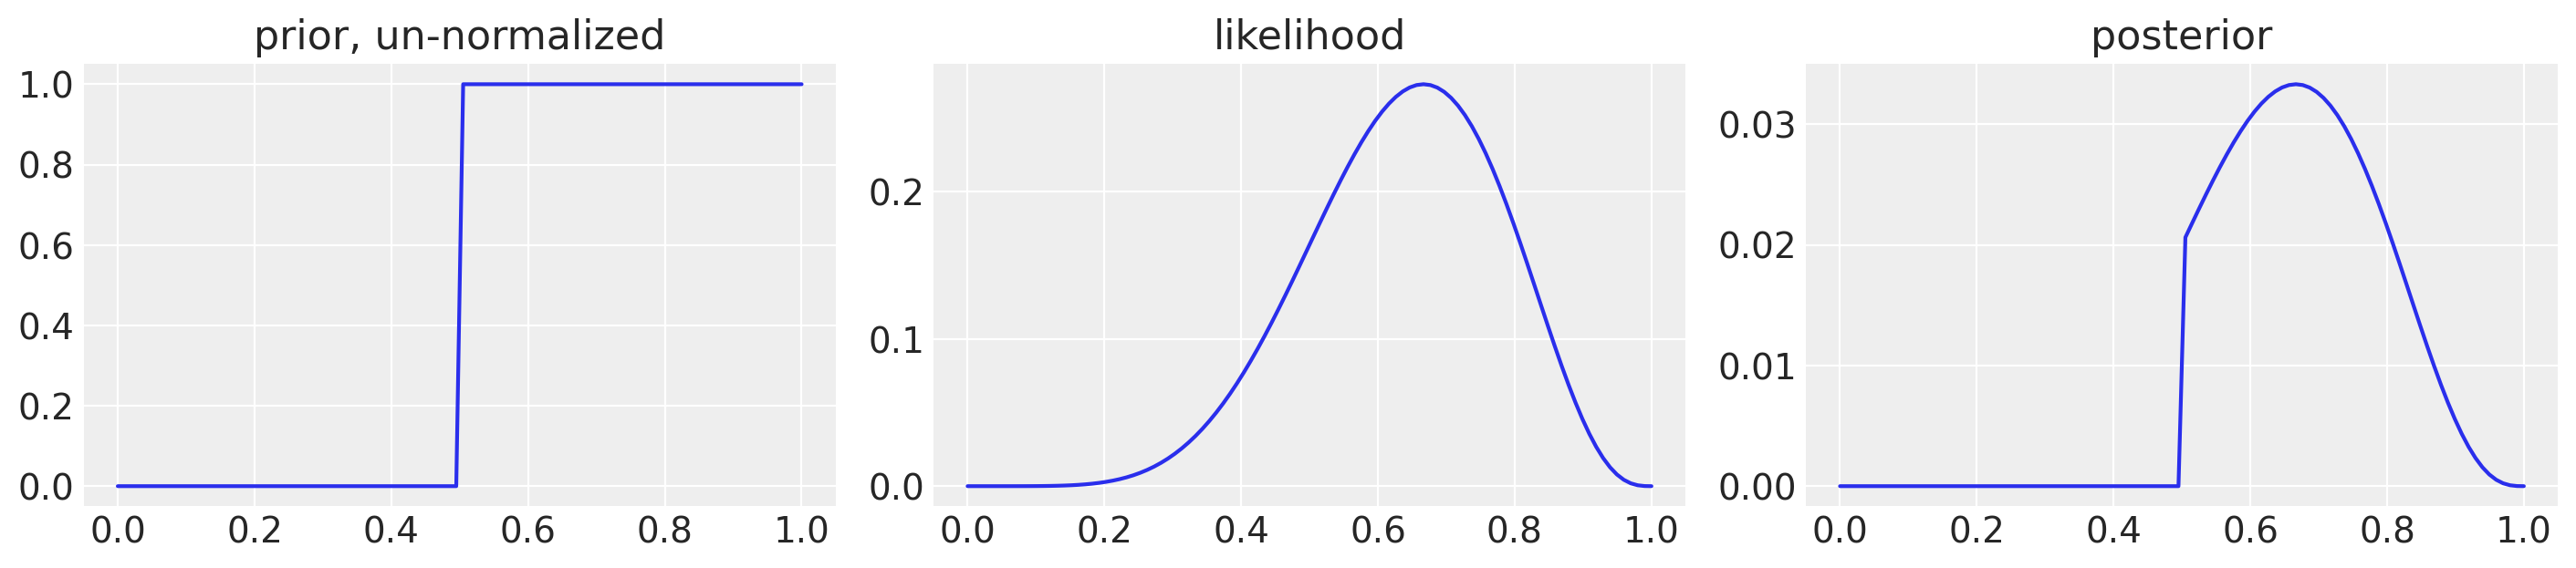

In [133]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = (p_grid >= 0.5).astype(np.float) # truncated
posterior_grid(n_grids, n_success, n_tosses, prior);

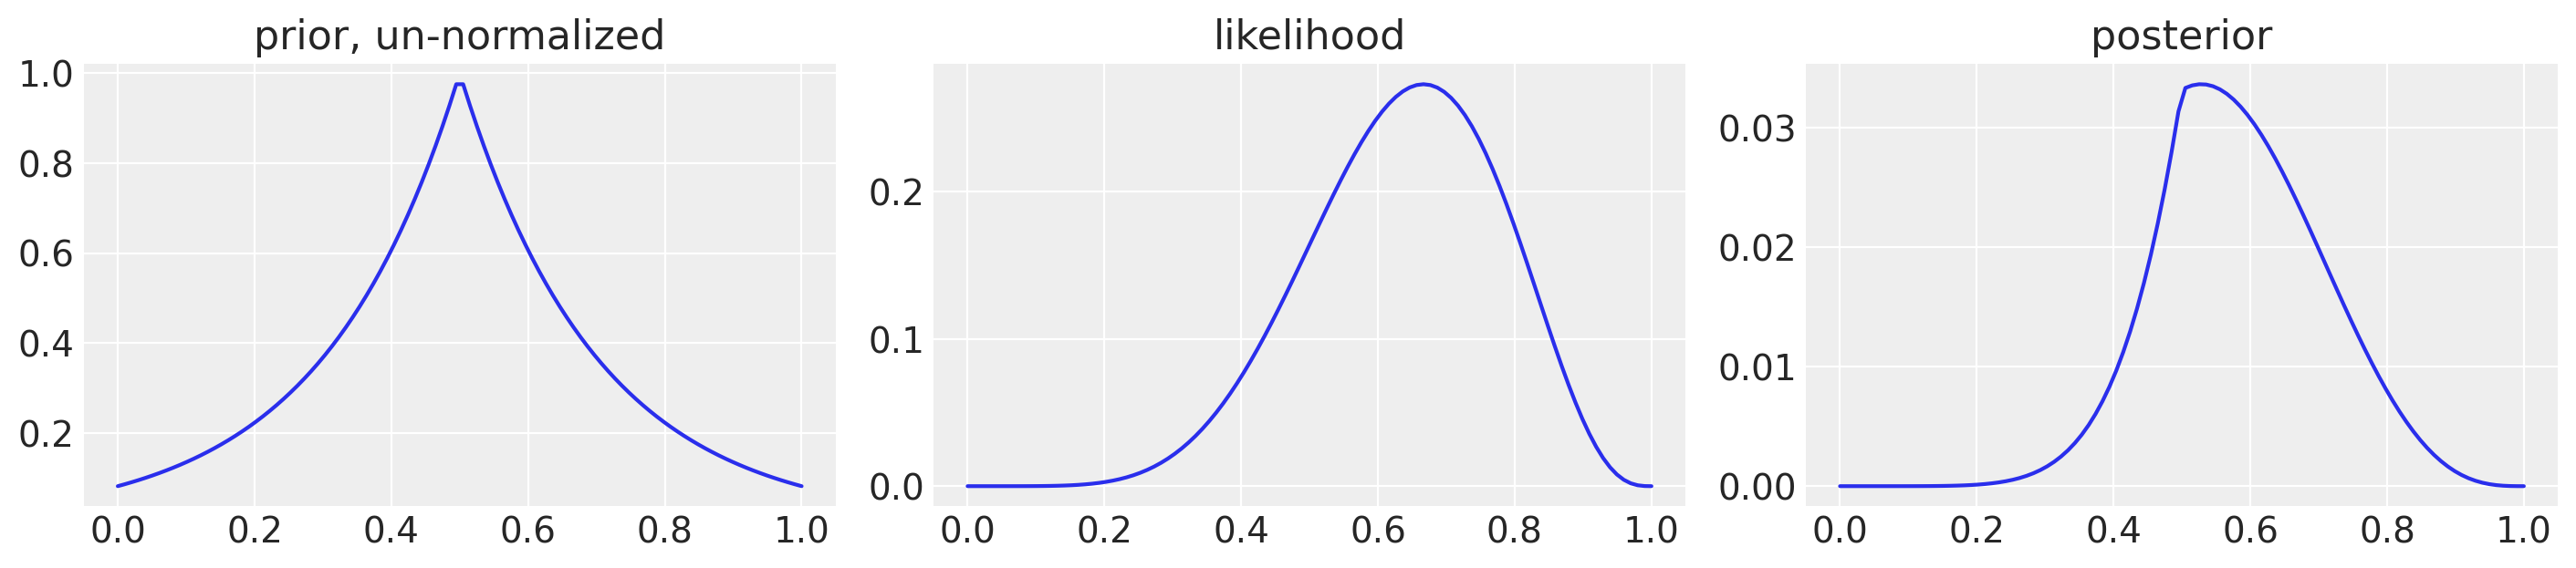

In [134]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = np.exp(-5*abs(p_grid - .5)) # double exp
posterior_grid(n_grids, n_success, n_tosses, prior);

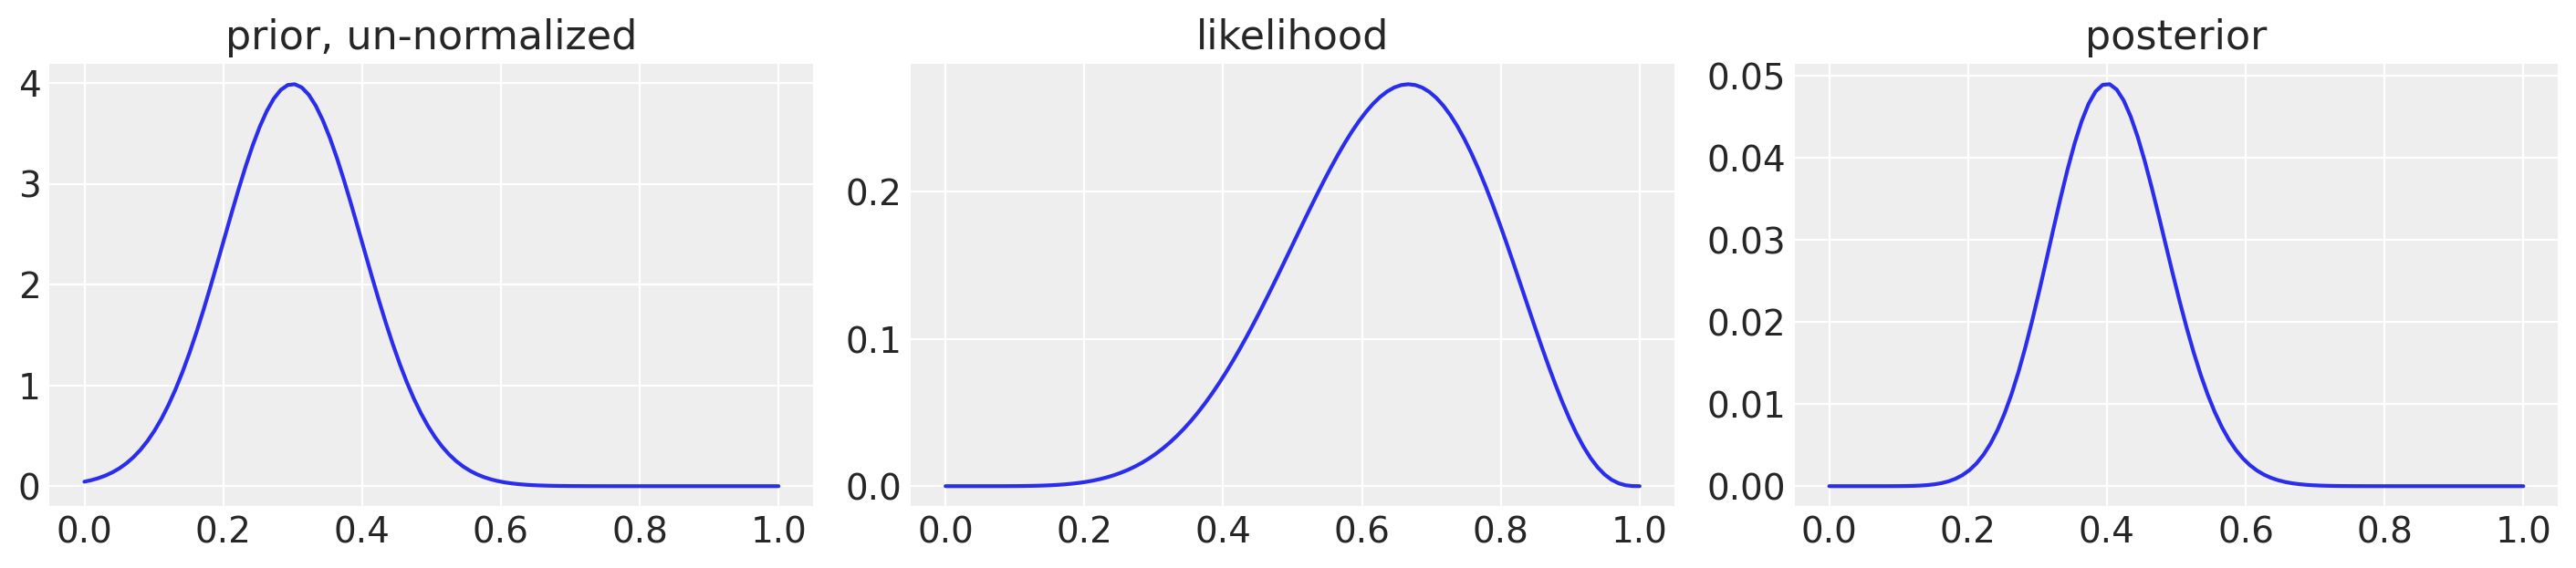

In [135]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = stats.norm.pdf(p_grid, loc=.3, scale=.1)
posterior_grid(n_grids, n_success, n_tosses, prior);

## Now Sampling

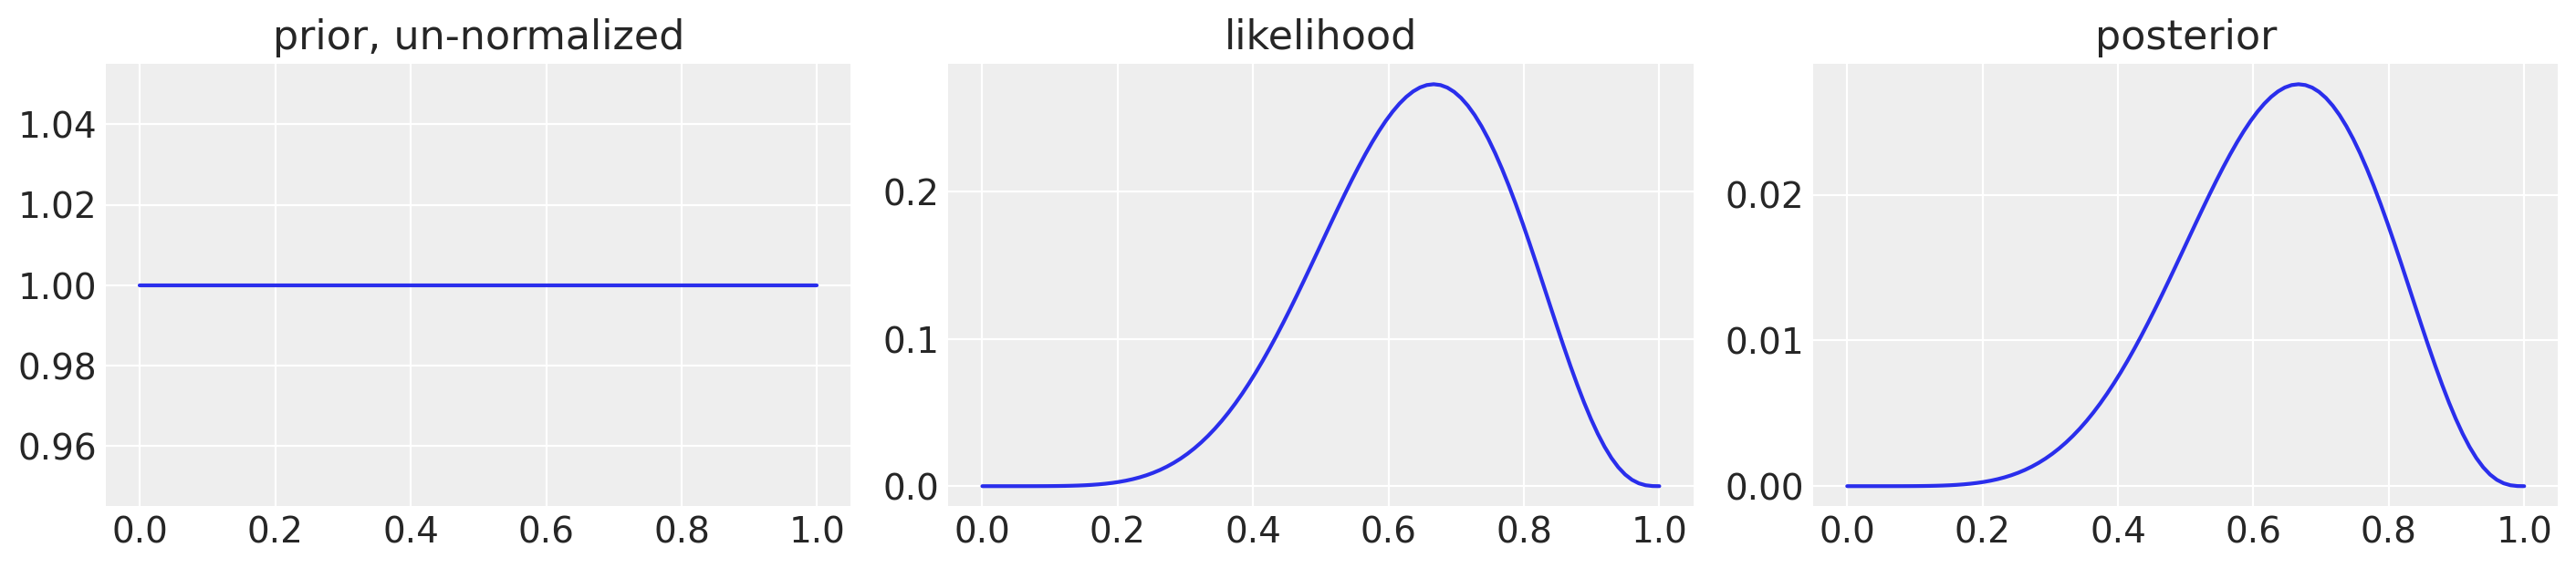

In [136]:
p_grid, posterior = posterior_grid(n_grids, n_success, n_tosses, prior='uniform')

random sample among the values of p_grid array

In [137]:
samples = np.random.choice(p_grid, p=posterior, size=30000, replace=True)

Text(0.5, 1.0, 'sample histogram')

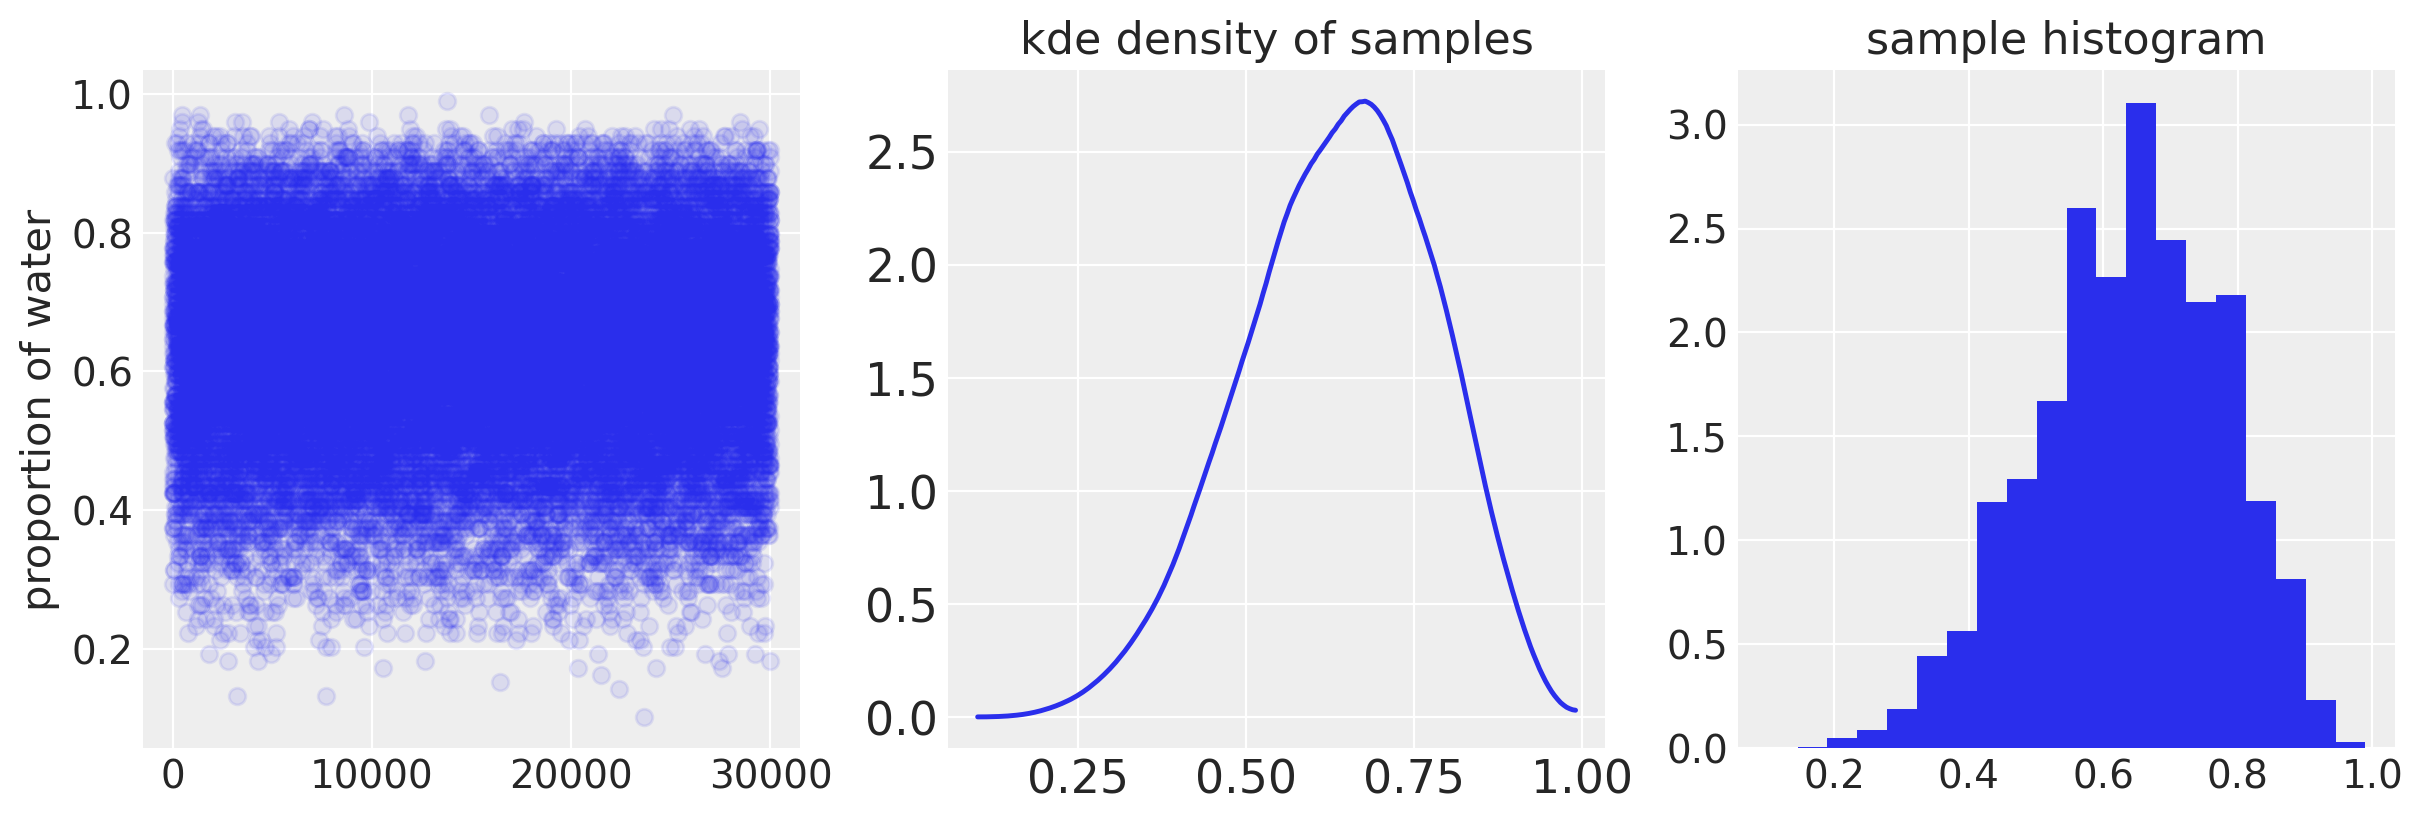

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].plot(samples, 'o', alpha=.1);
axes[0].set_ylabel('proportion of water');
az.plot_kde(samples, ax=axes[1]);
axes[1].set_title('kde density of samples');
axes[2].hist(samples, bins=20, density=True);
axes[2].set_title('sample histogram')

---
A **percentile** (or a centile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls. For example, the 20th percentile is the value (or score) below which 20% of the observations may be found. See [Wikipedia](https://en.wikipedia.org/wiki/Percentile#:~:text=A%20percentile%20(or%20a%20centile,the%20observations%20may%20be%20found.).

---

In [139]:
np.percentile(samples, [10, 90])

array([0.44444444, 0.81818182])

In [140]:
samples.sort()
n = len(samples)
samples[n//10], samples[n*9//10]

(0.4444444444444445, 0.8181818181818182)

In [141]:
samples[ : len(samples)//10 ].sum() / len(samples)

0.038021885521885526

In [142]:
np.percentile(samples, 50), samples[len(samples)//2]

(0.6464646464646465, 0.6464646464646465)

In [143]:
samples.mean(), np.percentile(samples, 50)

(0.6371538720538721, 0.6464646464646465)

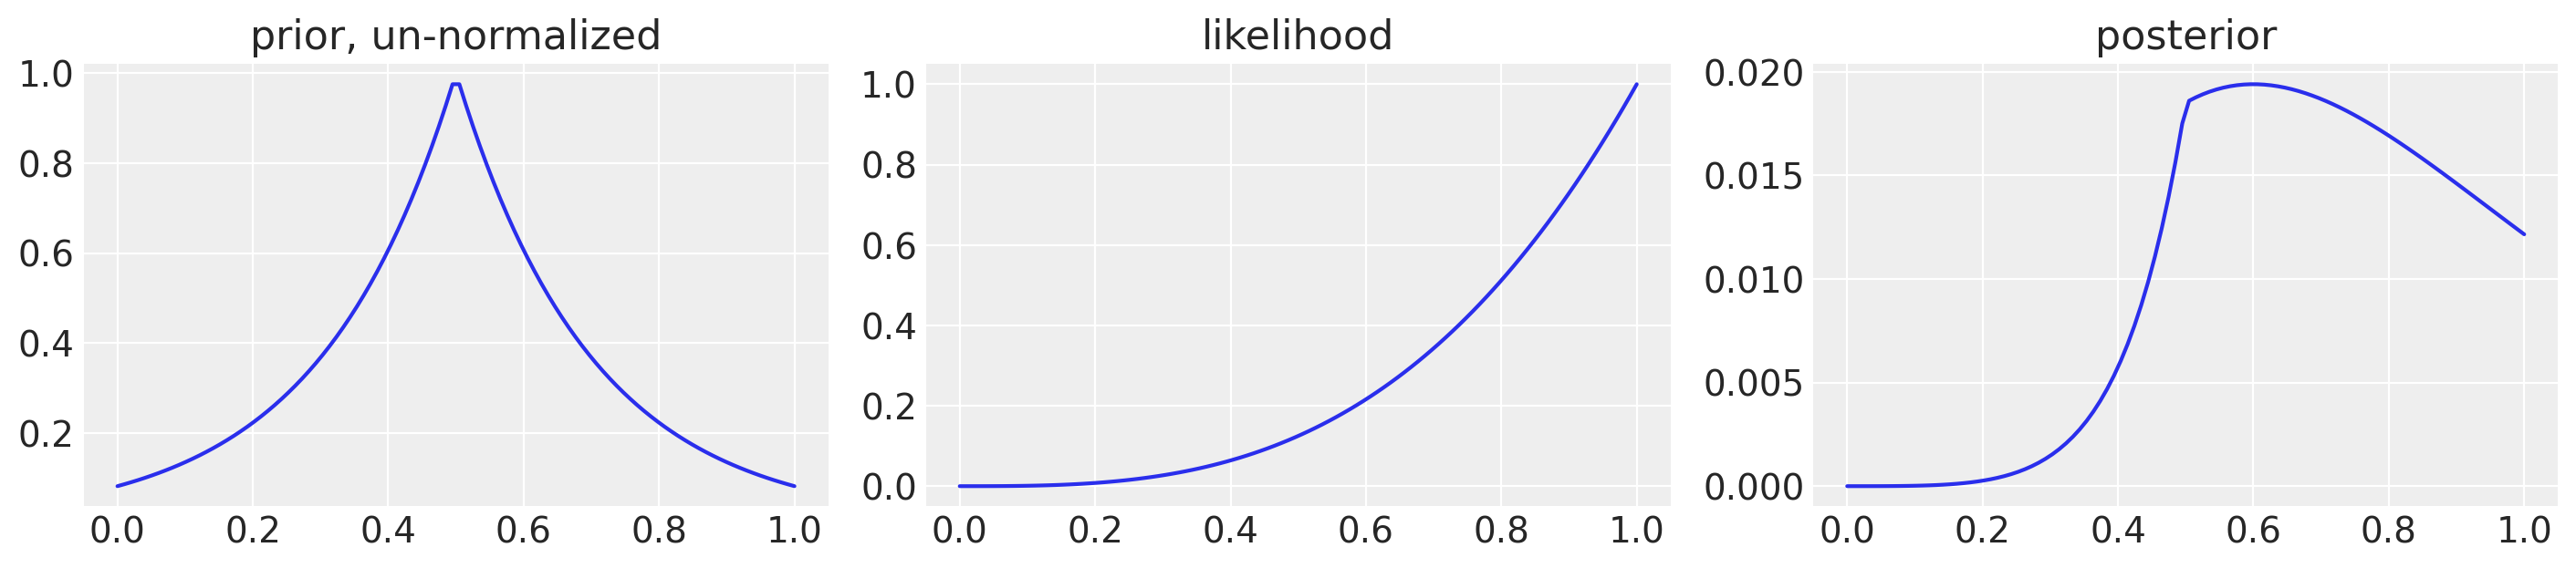

In [145]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = np.exp(-5*abs(p_grid - .5)) # double exp
p_grid, posterior = posterior_grid(n_grids, n_success=3, n_tosses=3, prior=prior)

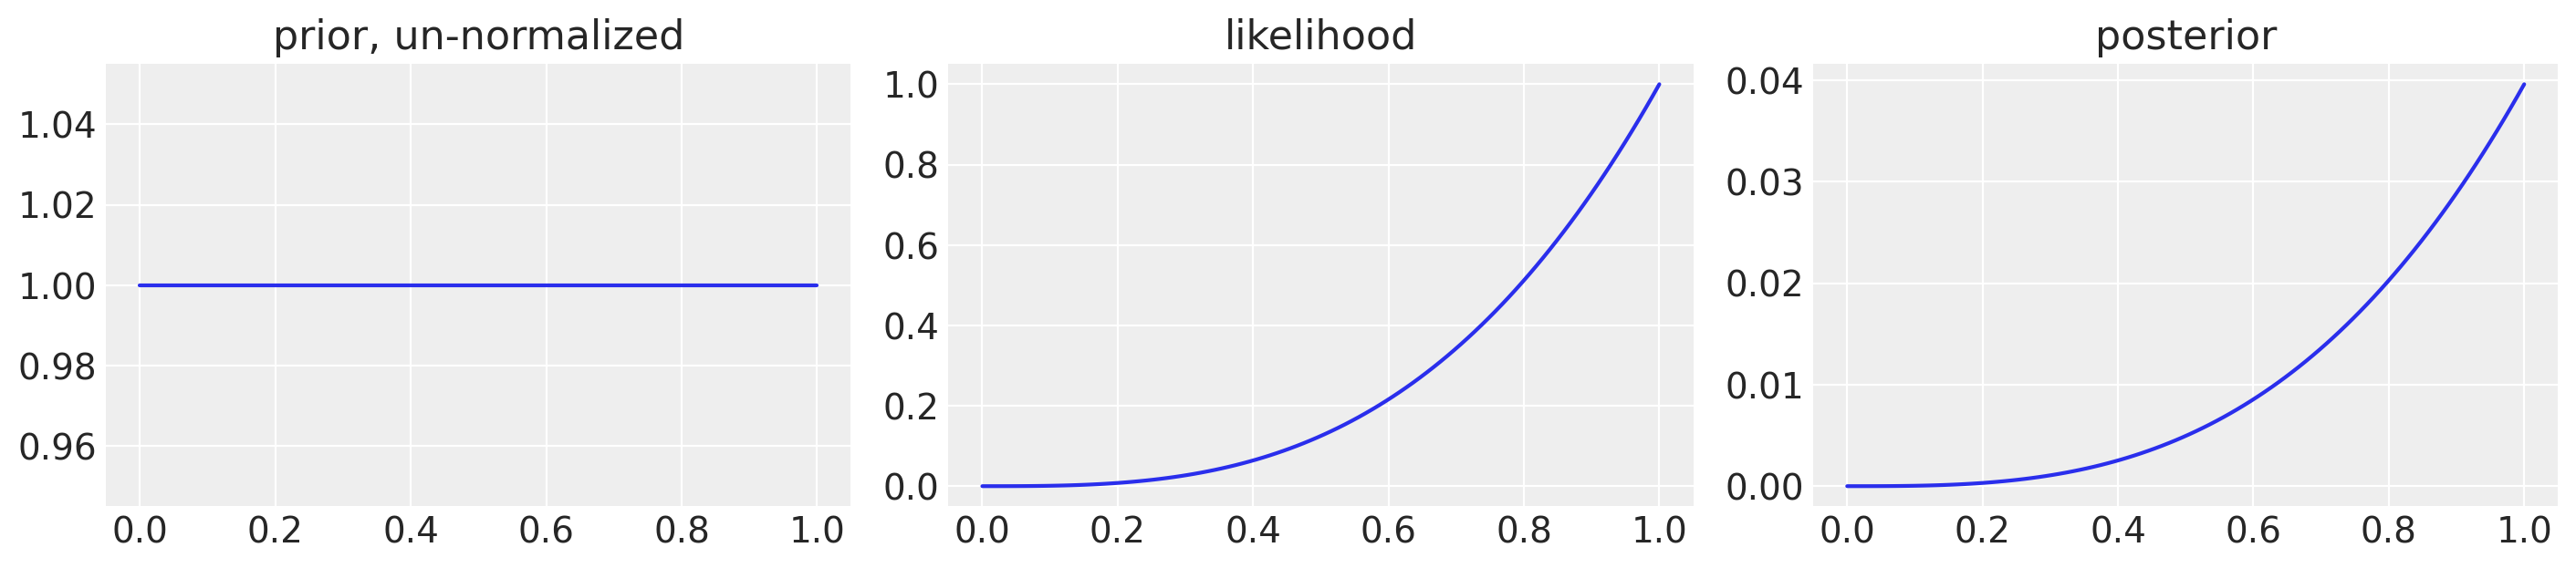

In [147]:
p_grid, posterior = posterior_grid(n_grids=100, n_success=3, n_tosses=3)

In [148]:
samples = np.random.choice(p_grid, p=posterior, size=20000, replace=True)
np.percentile(samples, [10, 90])

array([0.56565657, 0.97979798])

In [153]:
np.percentile(samples, [25, 50, 75])

array([0.70707071, 0.84848485, 0.93939394])

In [152]:
hdi = az.hdi(samples, hdi_prob=.5)
hdi

array([0.84848485, 1.        ])

In [166]:
len(samples[ samples <= hdi[0] ]) / len(samples)

0.52005

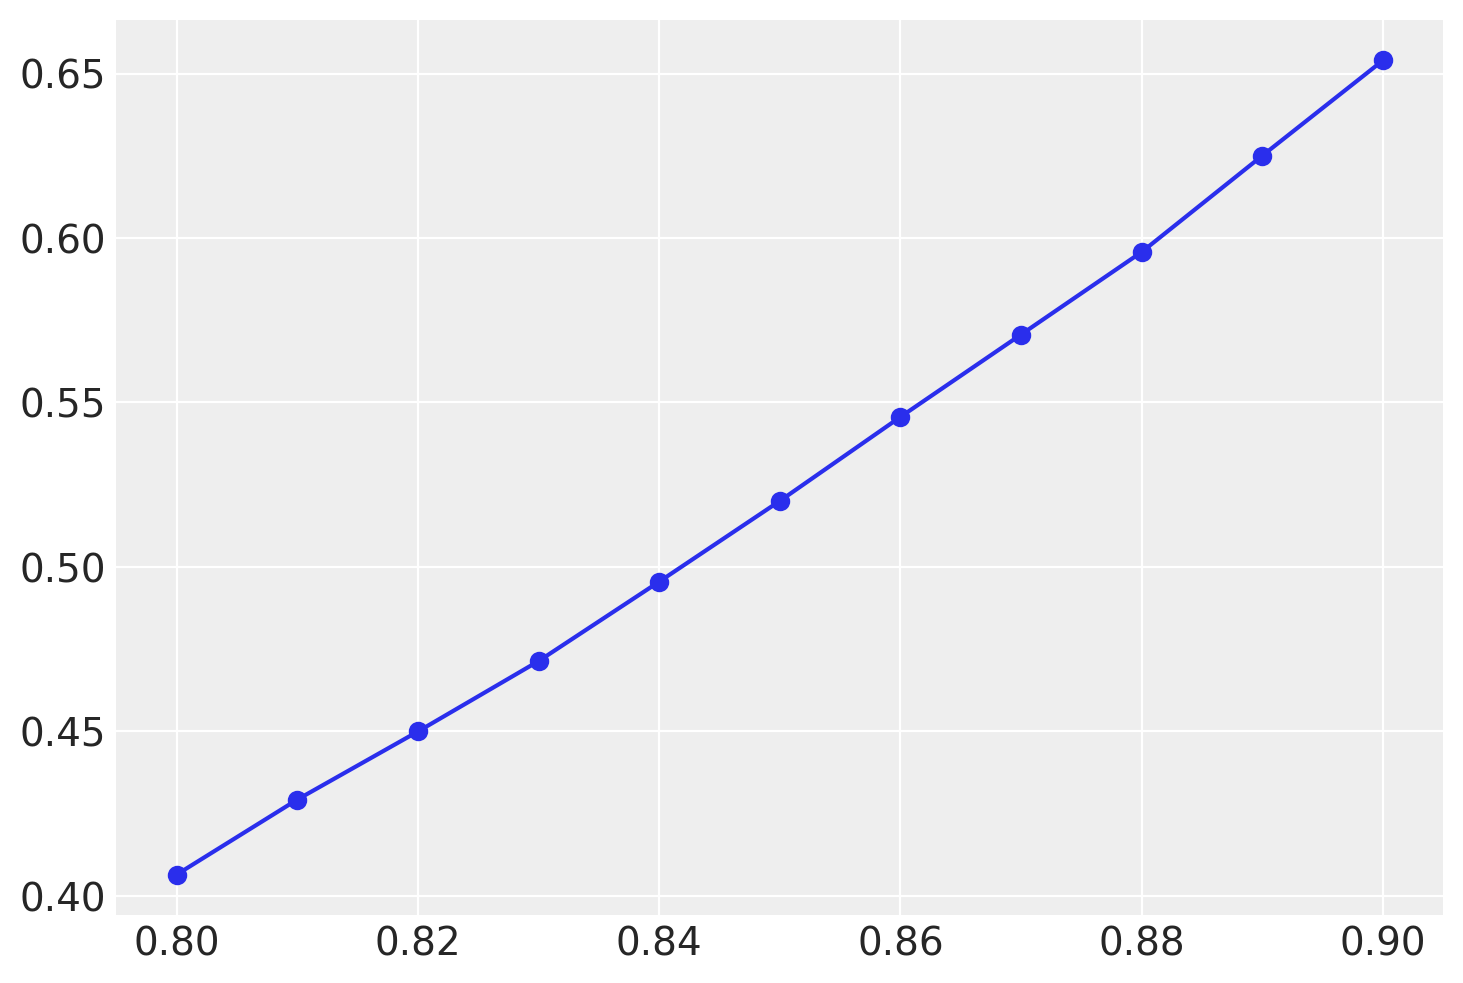

In [178]:
prop = []
x = np.linspace(.80, .90, 11)
for th in x:
    prop.append( len(samples[ samples <= th ]) / len(samples) )
plt.plot(x, prop, '-o');